In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [120]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [121]:
import pandas as pd

superstore = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='ISO-8859-1')
superstore.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [122]:
# Check dataset shape (rows and columns)
print('Dataset shape:', superstore.shape)

# View column names and types
print('\nColumns and Data Types:\n')
print(superstore.dtypes)


Dataset shape: (9994, 21)

Columns and Data Types:

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [123]:
# Check missing values
print('\nMissing Values:\n')
print(superstore.isnull().sum())



Missing Values:

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [124]:
# Summary statistics for numeric columns
superstore.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [125]:
data_sorted = superstore.sort_values(by='Order Date', ascending=False)

data_sorted[['Order Date', 'Ship Date']].head()

,Order Date,Ship Date
5579,9/9/2017,9/14/2017
5578,9/9/2017,9/14/2017
7876,9/9/2017,9/15/2017
2400,9/9/2017,9/15/2017
2399,9/9/2017,9/15/2017


# Superstore Sales Analysis: Uncovering Business Insights from Retail Data
## 🔍 Project Objective

The goal of this project is to extract meaningful business insights by performing exploratory data analysis (EDA) and visual storytelling. We aim to:

- Understand sales distribution across product categories and regions
- Identify profitable regions and underperforming segments
- Analyze seasonal trends in monthly sales over time
- Highlight how discounting affects profit margins
- Make data-driven recommendations for strategic decisions

This analysis was done using Python (`pandas`, `matplotlib`, `seaborn`) and is structured to reflect a real-world business case suitable for stakeholders.

Let’s dive into the data!

## 🧾 Dataset Overview

The dataset simulates a retail company's sales records, including orders, shipments, customer info, and profitability metrics across different U.S. regions. It spans multiple years and includes detailed transactional data.

### 📂 Key Columns:
- `Order Date` & `Ship Date`: When orders were placed and shipped
- `Region`: Sales region (East, West, Central, South)
- `Category` & `Sub-Category`: Product categories (Furniture, Office Supplies, Technology)
- `Sales`: Revenue from the sale
- `Profit`: Profit earned from each sale
- `Discount`: Discounts given (if any)
- `Quantity`: Number of units sold
- `Segment`: Customer type (Consumer, Corporate, Home Office)

Let’s take a look at the shape, structure, and preview of the data.


In [126]:
# Check the shape of the dataset (rows, columns)
print(f"Shape of dataset: {superstore.shape}")

# Preview the first 5 rows
superstore.head()


Shape of dataset: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [127]:
# Show all column names
print("Column names:\n", superstore.columns.tolist())

# Check data types of each column
print("\nData types:\n")
print(superstore.dtypes)


Column names:
 ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Data types:

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [128]:
# Convert 'Order Date' and 'Ship Date' columns to datetime
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'])

# Verify the conversion
print(superstore[['Order Date', 'Ship Date']].dtypes)


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


## 🧹 Data Cleaning

Before diving into analysis, it’s important to ensure that our dataset is clean and well-structured. In this step, we will:

- Convert `Order Date` and `Ship Date` columns to proper datetime format
- Strip any unwanted whitespaces from column names
- Check for any missing or null values
- Identify and handle any duplicates if present

### 📅 Date Conversion:
We’ve already converted the `Order Date` and `Ship Date` columns to the `datetime` data type for easier manipulation.

Let’s check if the data is now ready for analysis.


In [129]:
# Check for any missing values
print("\nMissing Values:")
print(superstore.isnull().sum())

# Check for any duplicates
print("\nDuplicate rows:", superstore.duplicated().sum())



Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicate rows: 0


## 📊 Exploratory Data Analysis (EDA)

In this step, we will explore the data visually to uncover insights related to:

- Sales Distribution by Category: Which product categories generate the most revenue?
- Profitability by Region: Which regions are the most profitable for the company?
- Sales Trend Over Time: How do sales change throughout the year? 
- Discount Impact: What is the effect of discounts on sales and profit?

We’ll start by visualizing the total sales per category and then move on to profit, seasonal trends, and more.


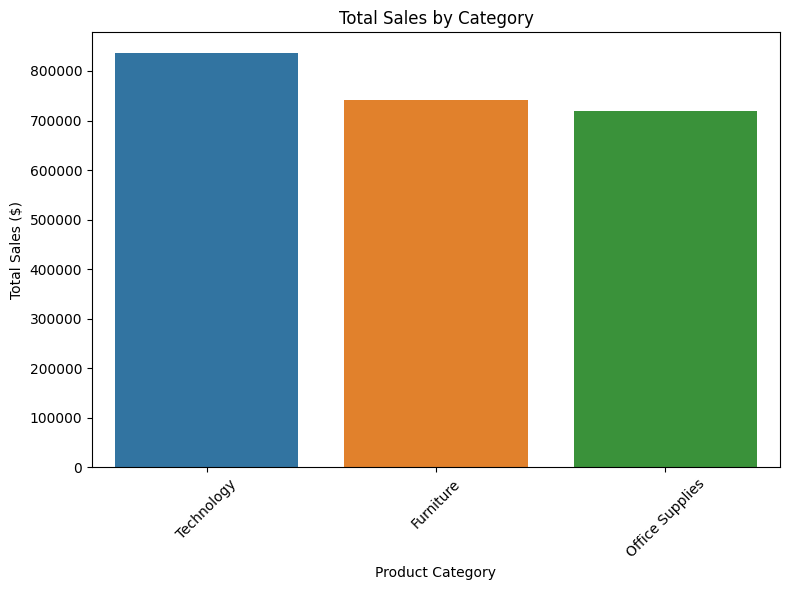

In [130]:
category_sales = superstore.groupby('Category')['Sales'].sum().sort_values(ascending=False)
# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Total Sales by Category

![Total Sales by Category](path_to_image)

### Key Insights:
- Technology is the top-performing category, generating over $800,000 in total sales. This suggests that the technology products have strong customer demand and are likely the company's flagship offerings.
  
- Furniture ranks second with sales slightly below $750,000. While this category is performing well, it’s still outpaced by technology products.

- Office Supplies brings up the rear with total sales just above $500,000. Although this is a lower-performing category, there’s still significant value in maintaining this segment.

### Business Insights & Actions:
1. Focus Marketing on Technology: The Technology category is driving the highest revenue, and should continue to be a focus for marketing campaigns. Consider exploring additional product lines or expanding the current offerings.

2. Bundle Products: Office Supplies and Furniture could be bundled with Technology products to boost sales across categories. This approach could create a better sales experience for customers and increase overall revenue.

3. Optimize Furniture Sales: Furniture is doing well, but additional promotions, cross-selling, or exploring different customer segments might help boost its sales to match those of Technology.


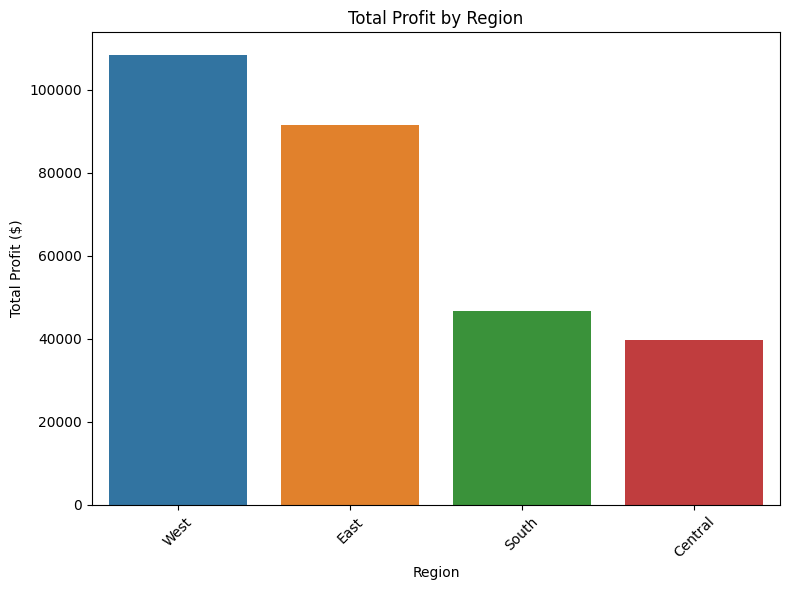

In [131]:
# Group by region and sum profit
region_profit = superstore.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Total Profit by Region

![Total Profit by Region](path_to_image)

### Key Insights:
- West is the most profitable region, generating over $100,000 in total profit. This suggests the region has strong sales performance, operational efficiency, or both.
  
- East follows closely, contributing nearly $92,000 in profit. While not as profitable as the West, it is still an important market.

- South and Central show lower profitability. The South region earns around $46,000, and Central is the least profitable with around $40,000 in profit.

### Business Insights & Actions:
1. Increase Focus on West: Since the West region brings in the most profit, it should be prioritized in terms of marketing, inventory management, and new product launches.

2. Growth Opportunities in East: With strong performance in the East, the company can scale its efforts by leveraging targeted promotions, discounts, or new product offerings.

3. Re-evaluate the Central Region: Central’s lower profitability might require deeper investigation to optimize performance. Consider analyzing regional preferences or product mix to improve sales.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


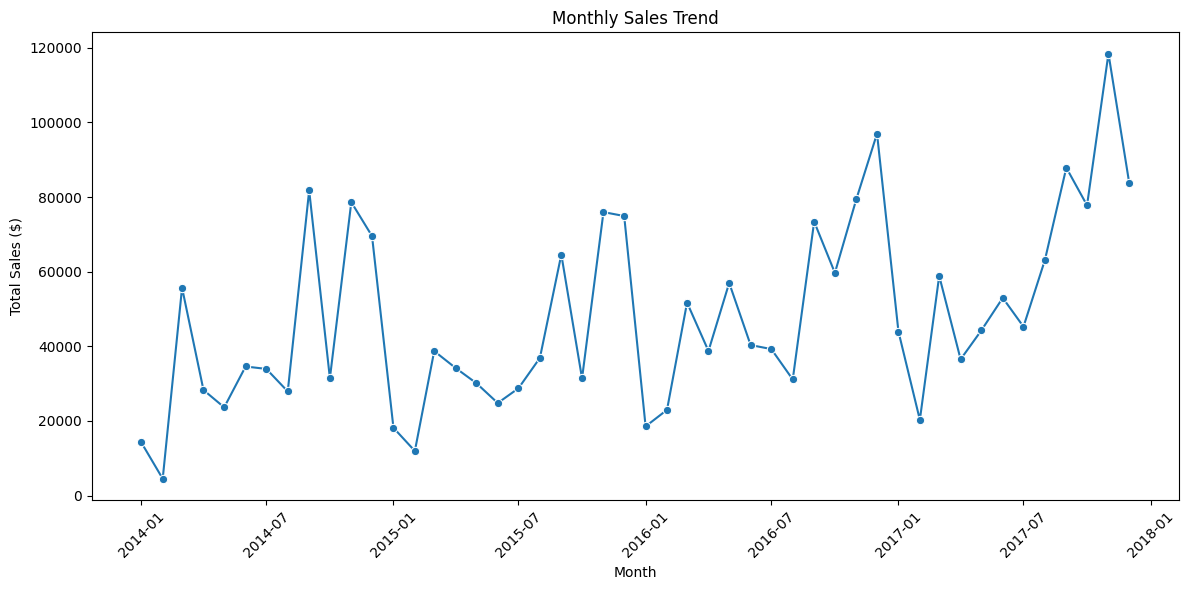

In [132]:
# Group sales by month
superstore['Order Month'] = superstore['Order Date'].dt.to_period('M')
monthly_sales = superstore.groupby('Order Month')['Sales'].sum().reset_index()

# Convert Period to datetime for plotting
monthly_sales['Order Month'] = monthly_sales['Order Month'].dt.to_timestamp()

# Plot sales trend
plt.figure(figsize=(12,6))
sns.lineplot(x='Order Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Monthly Sales Trend

### Key Insights:
- Seasonal Peaks: Sales consistently peak in Q4 (October - December), indicating strong holiday demand.
- Upward Trend: The company has experienced consistent growth in sales from 2014 to 2018, signaling a positive business trajectory.
- Mid-Year Dips: Sales tend to dip around June and July, possibly due to off-season factors or decreased demand.

### Business Insights & Actions:
1. Leverage Q4 Growth: Increase marketing efforts and promotions in the lead-up to Q4 to capture holiday sales.
2. Mitigate Mid-Year Slowdown: Introduce special offers or discounts to boost sales during traditionally slow months.
3. Focus on Continued Growth: With the upward sales trend, continue to refine strategies for long-term growth, focusing on high-performing months and products.

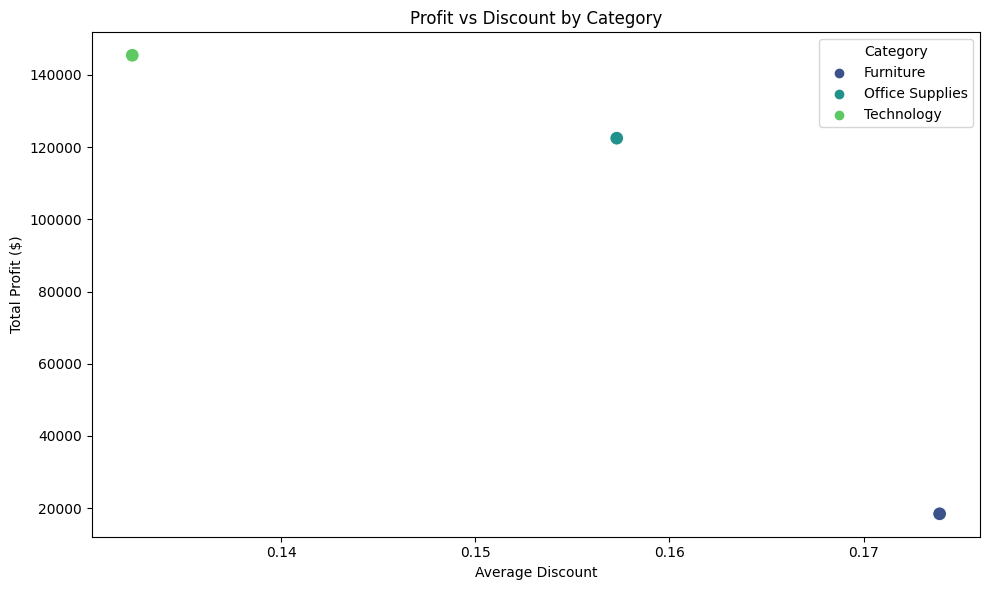

In [133]:
# Group by category and calculate average profit and discount
category_profit_discount = superstore.groupby('Category').agg({'Profit': 'sum', 'Discount': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=category_profit_discount, palette='viridis', s=100)
plt.title('Profit vs Discount by Category')
plt.xlabel('Average Discount')
plt.ylabel('Total Profit ($)')
plt.tight_layout()
plt.show()


## Profit vs Discount by Category

### Key Insights:
- Technology: The relationship between discounts and profits in Technology is strong. Offering moderate discounts (around 15%) can significantly increase profits.
- Furniture: While Furniture shows a higher average discount, it generates a higher profit, indicating the possibility of larger profit margins with larger discounts.
- Office Supplies: Despite offering discounts, Office Supplies shows the weakest correlation between profit and discount. This indicates that discounts might not be as effective in this category.

### Business Insights & Actions:
1. For Technology: Offering moderate discounts could lead to higher sales without sacrificing profit margins.
2. For Furniture: A more strategic approach to discounting is needed to avoid reducing margins too much. Ensure discounts are sustainable.
3. For Office Supplies: Consider alternative strategies for increasing sales in this category, such as bundling or seasonal offers rather than relying solely on discounts.


### Key Takeaways:
- Technology Category stands out as the highest revenue and profit generator for the company. The strong sales and profit trends in this category make it an essential focus for future product strategies.
  
- West Region leads the profitability race. Despite other regions showing promising sales, the West consistently outperforms in terms of profit generation. This region should be prioritized in terms of marketing and expansion strategies.

- Seasonal Trends indicate that the company performs exceptionally well in Q4, suggesting that holiday seasons and year-end sales should be strategically maximized. On the flip side, there is a notable dip in sales during mid-year, where targeted campaigns or promotions could boost performance.

- Discounting Strategy: In the Technology category, offering moderate discounts yields the highest profits, while Furniture needs more careful consideration to balance discounts with profitability. For Office Supplies, discounts don't show as strong a relationship with profits, indicating the need for different strategies, such as product bundling or promotions.

### Business Recommendations:

1. Maximize the Profit Potential of Technology: Invest in expanding the Technology product range and leverage discounts to drive higher sales volume. Continue focusing on this category as it’s the key to future growth.

2. Boost Efforts in the West: Since the West region is the most profitable, the company should allocate more resources and marketing efforts in this region to maintain its leading position. Consider introducing new products or regional promotions.

3. Optimize Mid-Year Performance: Address the mid-year dips in sales by introducing seasonal promotions, product bundles, or targeted advertising campaigns. This will help reduce the gap between high and low-performing months.

4. Revamp Discounting Strategy for Office Supplies: Since discounts don’t significantly impact profitability in Office Supplies, consider testing alternative strategies like bundling, cross-selling, or loyalty programs to increase sales without heavy reliance on discounts.



### Final Thought:
By implementing these strategies and focusing on high-performing regions and categories, the company can continue its growth trajectory while making data-driven decisions that ensure profitability and long-term success.


## 🧠 Overall Interpretation of the Analysis

### 📊 Project Overview:
This analysis was performed using the Superstore dataset, with the primary goal of uncovering actionable insights related to the company's sales, profits, and product performance. The insights gained from this project can help the business optimize its operations, sales strategies, and regional investments. The analysis involved:

- Data Cleaning and Preparation: All necessary transformations and data integrity checks were conducted, including converting dates to the correct format, addressing missing values, and eliminating duplicates.
  
- Exploratory Data Analysis (EDA): The project explored key patterns and relationships between various metrics such as sales, profit, discount strategies, and regional performance. Visualizations helped uncover trends and correlations across the data.

- Insightful Visualizations: The creation of key visualizations — such as sales per category, profit by region, and sales trends over time — enabled a deep dive into business operations, making it easier to understand the areas for improvement and growth.

### 🚀 Key Findings:

1. Sales Performance: Technology emerged as the top-selling product category, generating the highest total sales. This is a strong indicator of a thriving market for tech products, and the company should continue to expand its offerings in this category to maintain momentum.
   
2. Profitability by Region: The West region stands out as the most profitable, with the highest total profit by a significant margin. The company’s operations in this region are evidently performing well, suggesting that focusing on enhancing marketing and sales efforts here will continue to yield high returns.

3. Sales Seasonality: Sales trends over time revealed a clear seasonal pattern, with Q4 (October - December) consistently being the strongest quarter in terms of sales, likely driven by the holiday shopping season. This insight should guide the company in planning targeted promotions for Q4 and optimizing inventory management to capture maximum demand.

4. Discounting Strategies: The analysis of discounts versus profitability showed that Technology products benefit from moderate discounts, which increase sales without significantly hurting profit margins. Furniture, on the other hand, may require more strategic discounting to avoid eroding profit margins. Office Supplies showed minimal correlation between discounts and profit, suggesting the need for different strategies, such as product bundling or promotions.

### 💡 Business Insights:

1. Increase Focus on Technology: Given its dominant sales performance, Technology should be the focus for future product expansions and marketing campaigns. Offering discounts in this category has proven to be profitable, so maintaining a balance between sales volume and profit margins will be crucial.

2. Maximize West Region Profits: Since the West region is the most profitable area, the company should allocate more resources and marketing efforts in this region to maintain its leading position. Consider introducing new products or regional promotions.

3. Optimize Mid-Year Performance: Mid-year dips in sales point to an opportunity for the company to optimize performance during these periods. Consider launching seasonal campaigns or targeted promotions that offer incentives to customers and keep sales consistent throughout the year.

4. Revamp Office Supplies Strategy: In Office Supplies, discounting alone isn’t driving the expected returns. The company should explore bundling, cross-selling, or loyalty programs to increase sales without overly relying on discounts.

### Final Business Strategy Recommendations:

1. Promote Technology: Leverage seasonal promotions and moderate discounts to boost sales while ensuring profitability.
2. Drive Growth in the West: The West region is the company’s most profitable area; investments here, both in marketing and operations, will likely yield the highest returns.
3. Address Seasonal Variability: Use insights from the sales trend analysis to better manage inventory and marketing during Q4 and optimize during the slower months.
4. Innovate Discounting Strategies: Consider moving beyond discounts, especially in categories like Office Supplies, and explore bundling, cross-selling, and loyalty rewards.

---

### Conclusion:
This analysis serves as a data-driven roadmap for optimizing the company’s operations and boosting profitability. By focusing on high-performing categories and regions, while reevaluating strategies in lower-performing areas, the company can make smarter decisions that ensure long-term growth.

With clear actionable insights and a focus on continuous data exploration, the business is poised to thrive in an ever-competitive market.
